In [2]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# aquí extraemos los elementos de la fecha que nos interesan
convert = lambda x: x.to_pydatetime()
get_year = lambda x: convert(x).year
get_month = lambda x: '{:02}-{:02}'.format(convert(x).day, convert(x).month) #inefficient
get_date = lambda x: '{:02}-{:02}-{}'.format(convert(x).day, convert(x).month, convert(x).year) #inefficient
get_day = lambda x: convert(x).day
get_day_of_week = lambda x: convert(x).weekday()

In [4]:
vacunas = pd.read_csv("./datasets/vaccine.csv", header=0)

In [5]:
vacunas.head()

,Entity,Code,Continent,Day,Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Johnson&Johnson,Sputnik V,Sinovac,Sinopharm/Beijing,CanSino
0,Austria,AUT,Europe,08/01/2021,31359,0,0,0,0,0,0,0
1,Austria,AUT,Europe,15/01/2021,116485,92,0,0,0,0,0,0
2,Austria,AUT,Europe,22/01/2021,213949,320,0,0,0,0,0,0
3,Austria,AUT,Europe,29/01/2021,258893,4288,0,0,0,0,0,0
4,Austria,AUT,Europe,05/02/2021,354995,5990,0,0,0,0,0,0


In [74]:
vacunas.dtypes

Entity                object
Code                  object
Continent             object
Day                   object
Pfizer/BioNTech        int64
Moderna                int64
Oxford/AstraZeneca     int64
Johnson&Johnson        int64
Sputnik V              int64
Sinovac                int64
Sinopharm/Beijing      int64
CanSino                int64
dtype: object

In [54]:
print(vacunas["Day"][0])

08/01/2021


# nos aseguramos que Day es un objeto

In [100]:
# aquí usamos map para crear un nuevo df
vacunas["Day"] =  pd.to_datetime(vacunas["Day"], infer_datetime_format=True)
vacunas["year"] = vacunas["Day"].map(get_year)
vacunas["month"] = vacunas["Day"].map(get_month)
vacunas["date"] = vacunas["Day"].map(get_date)
vacunas["day"] = vacunas["Day"].map(get_day)
vacunas["day_week"] = vacunas["Day"].map(get_day_of_week)

In [101]:
vacunas.columns

Index(['Entity', 'Code', 'Continent', 'Day', 'Pfizer/BioNTech', 'Moderna',
       'Oxford/AstraZeneca', 'Johnson&Johnson', 'Sputnik V', 'Sinovac',
       'Sinopharm/Beijing', 'CanSino', 'year', 'month', 'date', 'day',
       'day_week'],
      dtype='object')

In [102]:
pfizer_por_dia = vacunas.groupby(["date"])["Pfizer/BioNTech"].sum().reset_index(name="Pfizer")
pfizer_continente = vacunas.groupby(["Continent"])["Pfizer/BioNTech"].sum().reset_index(name="Pfizer")

In [103]:
pfizer_por_dia.tail()

,date,Pfizer
357,31-05-2021,307423789
358,31-07-2021,847245222
359,31-08-2021,867594102
360,31-10-2021,1014477345
361,31-12-2020,569024


In [104]:
pfizer_continente.tail()

,Continent,Pfizer
0,America,54258506034
1,Asia,9472772816
2,Europe,129054120326


<AxesSubplot:title={'center':'Vacunas Pfizer diarias globales - promedio semanal'}, xlabel='date'>

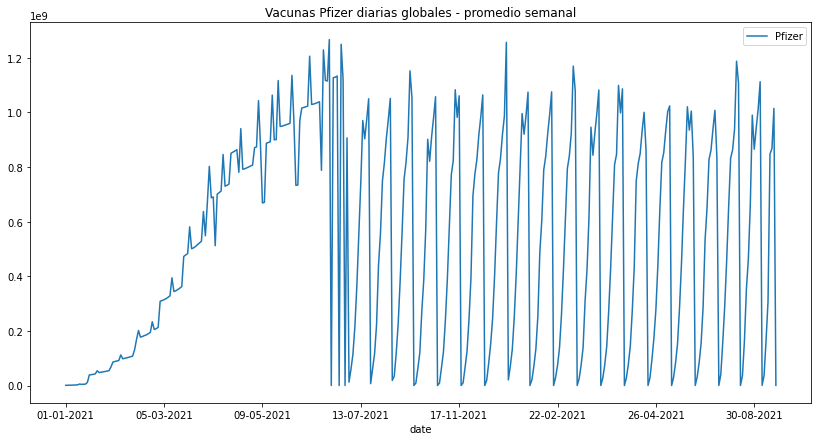

In [105]:
pfizer_por_dia["Media_Pfizer"] = pfizer_por_dia.Pfizer.rolling(window=7, center=True).mean()
pfizer_por_dia.plot(x="date", y="Pfizer", title= "Vacunas Pfizer diarias globales - promedio semanal", figsize=[14, 7])

Text(0.5, 0, 'Continente')

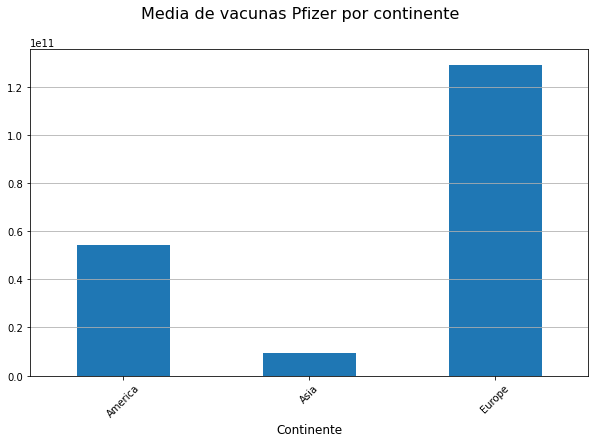

In [113]:
data = pfizer_continente.groupby(["Continent"])["Pfizer"].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='continente')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle("Media de vacunas Pfizer por continente", fontsize=16)
dow_labels = ["America","Asia","Europe"]
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Continente', fontsize=12, color="black")

In [107]:
moderna_por_dia = vacunas.groupby(["date"])["Moderna"].sum().reset_index(name="Moderna")
moderna_continente = vacunas.groupby(["Continent"])["Moderna"].sum().reset_index(name="Moderna")

In [108]:
moderna_por_dia.tail()

,date,Moderna
357,31-05-2021,36620744
358,31-07-2021,220589594
359,31-08-2021,237841331
360,31-10-2021,274215171
361,31-12-2020,62


In [109]:
moderna_continente.tail()

,Continent,Moderna
0,America,35442829979
1,Asia,1163645967
2,Europe,18372154594


<AxesSubplot:title={'center':'Vacunas Moderna diarias globales - promedio semanal'}, xlabel='date'>

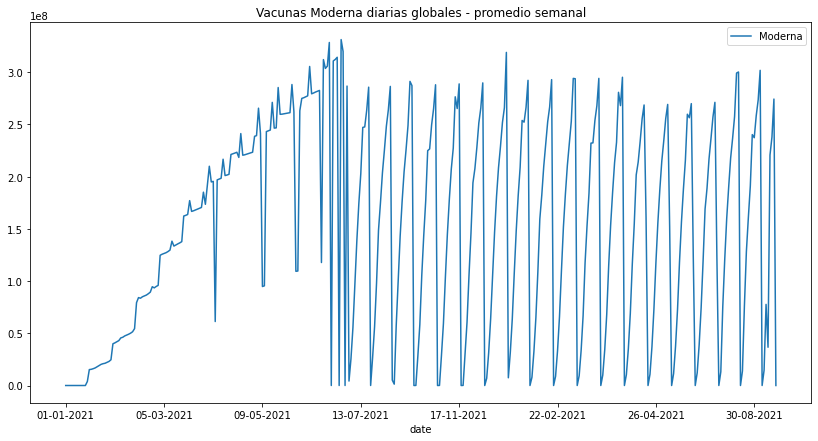

In [111]:
moderna_por_dia["Media_Moderna"] = moderna_por_dia.Moderna.rolling(window=7, center=True).mean()
moderna_por_dia.plot(x="date", y="Moderna", title= "Vacunas Moderna diarias globales - promedio semanal", figsize=[14, 7])

Text(0.5, 0, 'Continente')

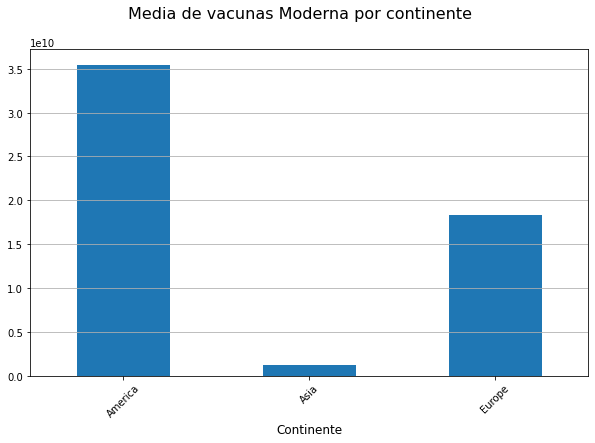

In [114]:
data2 = moderna_continente.groupby(["Continent"])["Moderna"].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data2.plot(kind='bar', x='continent')

n_groups = len(data2)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle("Media de vacunas Moderna por continente", fontsize=16)
dow_labels = ["America","Asia","Europe"]
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Continente', fontsize=12, color="black")